## ソート

In [70]:
import numpy as np

### 普通の選択ソート

In [71]:
def select_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        x[i], x[swap] = x[swap], x[i]
    return x

In [72]:
x = np.array([2,1,4,3,5])
print(select_sort(x))

[1 2 3 4 5]


### numpyによるソート

In [73]:
x = np.array([2,1,4,3,5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [74]:
%time print(select_sort(x))
%time print(np.sort(x))

[1 2 3 4 5]
CPU times: user 219 µs, sys: 42 µs, total: 261 µs
Wall time: 232 µs
[1 2 3 4 5]
CPU times: user 167 µs, sys: 36 µs, total: 203 µs
Wall time: 175 µs


In [75]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [76]:
 # 列ソート
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [77]:
# 行ソート
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### 部分ソート

In [78]:
x = np.array([7,2,3,1,6,5,4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [79]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

### k-means

In [80]:
X = rand.rand(10, 2)

In [91]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

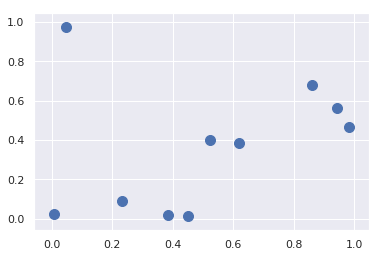

In [92]:
plt.scatter(X[:, 0], X[:, 1], s=100)

In [98]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [99]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
nearest =np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

In [101]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

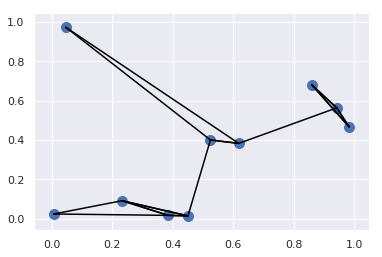

In [102]:
plt.scatter(X[:, 0], X[:, 1], s=100)
k = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')